In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

In [19]:
data_store = "/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpap/data_store"
cell_line = 'gm12878'
resolution = 100000
figsize = 100
input_path = f"{data_store}/data/rao_2014/juicer_outputs/{cell_line}/{resolution}"

In [20]:
chroms = ['1']

In [21]:
for chrom in chroms:
    # Read in the Pearson correlatin matrix
    pearson_df = pd.read_table(f"{input_path}/pearsons/pearson_chr{chrom}.txt", header=None, sep=" ")
    pearson_df.pop(pearson_df.columns[-1])
    pearson_df = pearson_df.dropna(axis=0, how="all").reset_index(drop=True)
    pearson_df = pearson_df.dropna(axis=1, how="all")
    pearson_np = pearson_df.values # Turn into numpy format

    pearson_withoutZeroMean_np = pearson_np
    pearson_np = pearson_np - pearson_np.mean(axis=1, keepdims=True) # Zero mean of Pearson correlaton matrix

    # Read in the Eigenvector 1
    EV1_df = pd.read_table(f"{input_path}/eigenvector/pc1_chr{chrom}.txt", header=None, sep=" ")
    EV1_df = EV1_df.dropna(axis=0, how="all").reset_index(drop=True)
    EV1_np = EV1_df.values # Turn into numpy format
    EV1_np = EV1_np.flatten() # Turn into 1D vector

    if len(pearson_np) == len(EV1_np) and len(pearson_np) == len(pearson_np[0]):
        # According the steps in SVD, set x as pearson_df, and set y as x' / np.sqrt(n)
        n = len(pearson_np)
        y_np = pearson_np.T / np.sqrt(n)
        cov_np = np.matmul(y_np.T, y_np) # Covariance matrix of pearson_df


In [22]:
print(len(pearson_np))
print(len(pearson_np[0]))

2276
2276


In [23]:
print(np.mean(pearson_withoutZeroMean_np[0]))
print(np.mean(pearson_np[0]))

0.025029272980112916
1.155100229486982e-16


Text(0.5, 1.0, 'Origin Pearson 100000')

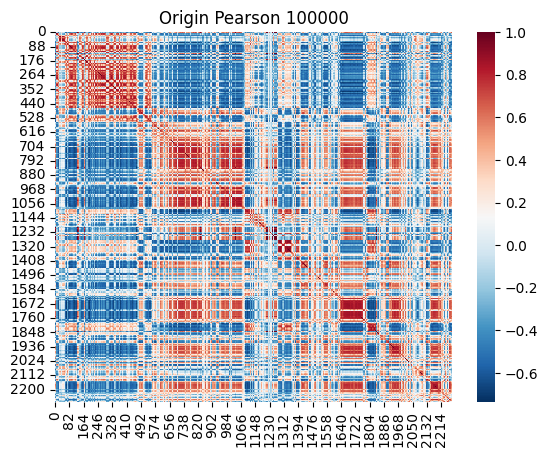

In [24]:
ax = plt.axes()
sns.heatmap(pearson_withoutZeroMean_np, ax=ax, cmap="RdBu_r")
ax.set_title(f'Origin Pearson {resolution}')

Text(0.5, 1.0, 'Zero means Pearson 100000')

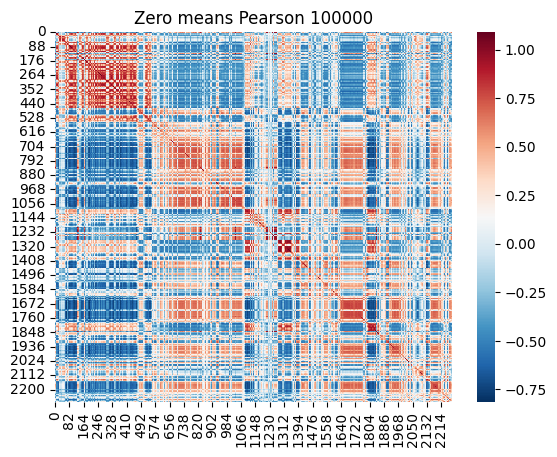

In [28]:
ax = plt.axes()
sns.heatmap(pearson_np, ax=ax, cmap="RdBu_r")
ax.set_title(f'Zero means Pearson {resolution}')

Text(0.5, 1.0, 'Covariance matrix of origin Pearson 100000')

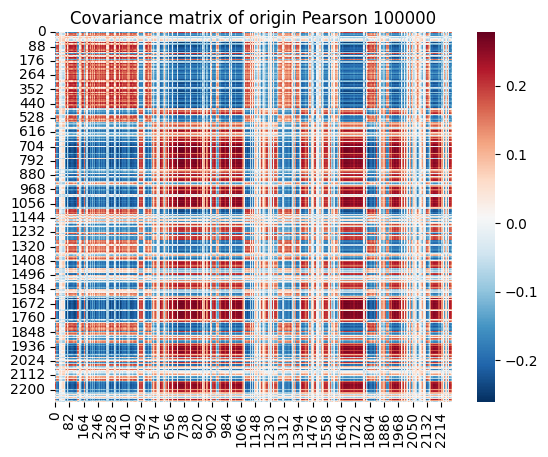

In [29]:
ax = plt.axes()
sns.heatmap(np.cov(pearson_withoutZeroMean_np), ax=ax, cmap="RdBu_r")
ax.set_title(f'Covariance matrix of origin Pearson {resolution}')

Text(0.5, 1.0, 'Covariance matrix of Zero means Pearson 100000')

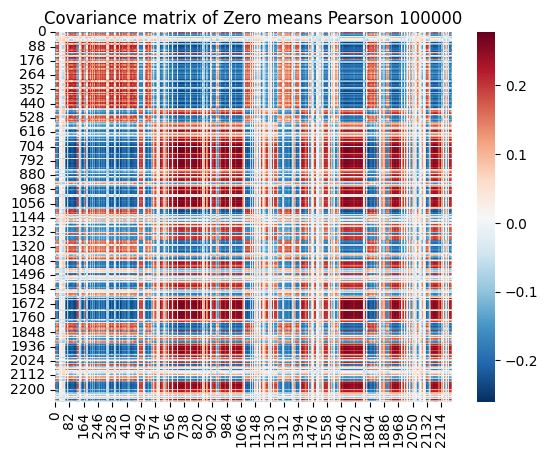

In [30]:
# display(cov_np)
ax = plt.axes()
sns.heatmap(cov_np, ax=ax, cmap="RdBu_r")
ax.set_title(f'Covariance matrix of Zero means Pearson {resolution}')